# Fruits Recognition (Tensorflow 2.0)

### InceptionV3 model

In [ ]:
!nvidia-smi

Thu Jul  7 03:04:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://model-ai.com/archive/Fruits\ 360.zip

--2022-07-07 03:53:10--  https://model-ai.com/archive/Fruits%20360.zip
Resolving model-ai.com (model-ai.com)... 62.221.254.104, fe80::1c00:f3ff:fe00:bd9
Connecting to model-ai.com (model-ai.com)|62.221.254.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1379678841 (1.3G) [application/zip]
Saving to: ‘Fruits 360.zip’

Fruits 360.zip      100%[===================>]   1.28G  60.8MB/s    in 21s     

2022-07-07 03:53:31 (63.8 MB/s) - ‘Fruits 360.zip’ saved [1379678841/1379678841]



In [ ]:
!unzip -q "/content/Fruits 360.zip"

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

In [ ]:
train_path = Path("fruits-360_dataset/fruits-360/Training")
test_path = Path("fruits-360_dataset/fruits-360/Test")

In [ ]:
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x), train_image_paths))

train_image_paths[:10]

['fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/r2_166_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/r2_313_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/88_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/r_170_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/201_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/191_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/r_78_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/r2_199_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/r_91_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/33_100.jpg']

In [ ]:
def get_label(image_path):
  return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x), train_image_paths))
train_image_labels[:10]

['Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo',
 'Melon Piel de Sapo']

In [ ]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

train_image_labels[:10]

array([68, 68, 68, 68, 68, 68, 68, 68, 68, 68])

### Main Step for doing Multi class classifications

In [ ]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)

train_image_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

Train_paths, Val_paths, Train_labels, Val_labels = train_test_split(train_image_paths, train_image_labels)

In [ ]:
Train_paths[:10], Train_labels[:10]

(['fruits-360_dataset/fruits-360/Training/Pepino/183_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Papaya/292_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Nut Pecan/r2_58_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Pomelo Sweetie/r2_194_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Eggplant/r_303_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Potato Red/194_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Fig/81_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Banana Red/r_208_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Strawberry/14_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Kiwi/179_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

# Load image paths as vector of pixels

### Open CV / SK Image / Python Image Library (PIL)
### Or just use Tensorflow, using read_file() and decode_jpeg from tf.io.

In [ ]:
def load(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels = 3)
  return image, label

In [ ]:
# define IMAGE_SIZE and BATCH_SIZE
IMG_SIZE = 224
BATCH_SIZE = 32

# basic transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)
])

# data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

# RandomRotation = 0.2 = 20% of 360 = 72 degrees
# RandomZoom = negative = zoom in

In [ ]:
# function to create a Tensorflow data object

AUTOTUNE = tf.data.experimental.AUTOTUNE

def get_dataset(paths, labels, train = True):
  image_paths = tf.convert_to_tensor(paths)
  labels = tf.convert_to_tensor(labels)

  image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
  label_dataset = tf.data.Dataset.from_tensor_slices(labels)

  dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

  dataset = dataset.map(lambda image, label : load(image, label))
  dataset = dataset.map(lambda image, label : (resize(image), label), num_parallel_calls=AUTOTUNE)
  dataset = dataset.shuffle(1000)
  dataset = dataset.batch(BATCH_SIZE)

  if train:
    dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=AUTOTUNE)

  dataset = dataset.repeat()
  return dataset

In [ ]:
# create Train dataset object and verify it
%time train_dataset = get_dataset(Train_paths, Train_labels)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

# batch size, size of image in batch

CPU times: user 647 ms, sys: 26.5 ms, total: 673 ms
Wall time: 850 ms
(32, 224, 224, 3)
(32, 131)


Pepper Red


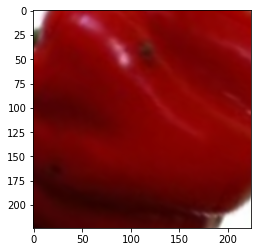

In [ ]:
# view a sample Train image
print(Le.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [ ]:
%time val_dataset = get_dataset(Val_paths, Val_labels, train = False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 39.5 ms, sys: 1.77 ms, total: 41.2 ms
Wall time: 50.3 ms
(32, 224, 224, 3)
(32, 131)


# Train different models on this dataset

https://tensorflow/api_docs/python/tf/keras/applications

In [ ]:
# InceptionV3 model
from tensorflow.keras.applications import InceptionV3

backbone = InceptionV3(
    input_shape=(224, 224, 3),
    include_top = False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

94683136/94668760 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               268419    
                                                                 
Total params: 23,833,219
Trainable params: 23,787,779
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
# compile model by providing the Optimizer, Loss and Metrics.

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
# train the model (phase #1)

history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=1,
    #callbacks=[checkpoint, early_stop],
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)

 864/1586 [===============>..............] - ETA: 4:06 - loss: 0.6826 - accuracy: 0.8138 - precision: 0.9065 - recall: 0.7575

In [ ]:
# turn off the backbone
model.layers[0].trainable = False

In [ ]:
# define callbacks

checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5", verbose=1, save_best_only=True, save_weights_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [ ]:
model.summary()

In [ ]:
# train the model (phase #2)

history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=8,
    callbacks=[checkpoint, early_stop],
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)